# data

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
from datetime import datetime

In [380]:
data=pd.read_csv('result.csv')

In [381]:
data.query('volume=="--" | amount=="--"|turnoverRatio=="--"|totalCapital=="--"')

,number,time,thscode,open,high,low,close,volume,amount,turnoverRatio,totalCapital,pe,pb


In [382]:
data['time']=data['time'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [383]:
#603939.SH 益丰药业
#603368.SH 柳药集团
#601688.SH 华泰证券
#601225.SH 陕西煤业
#600030.SH 中信证券
#000983.SZ 山西焦煤

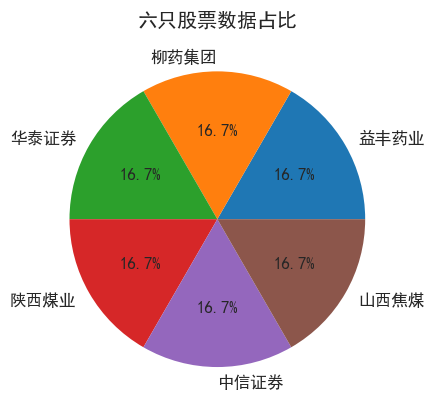

In [384]:
code = ['603939.SH', '603368.SH', '601688.SH', '601225.SH', '600030.SH', '000983.SZ']
name = ['益丰药业', '柳药集团', '华泰证券', '陕西煤业', '中信证券', '山西焦煤']
data['thscode'].value_counts()
plt.pie(data['thscode'].value_counts(), labels=name, autopct="%1.1f%%")
plt.title("六只股票数据占比")
plt.show()

In [385]:
yfyy=data[data['thscode']=="603939.SH"]
lyjt=data[data['thscode']=="603368.SH"]
htzq=data[data['thscode']=="601688.SH"]
sxmy=data[data['thscode']=="601225.SH"]
zxzq=data[data['thscode']=="600030.SH"]
sxjm=data[data['thscode']=="000983.SZ"]

In [386]:
yfyy=yfyy.sort_values(by='time', ascending=True)
lyjt=lyjt.sort_values(by='time', ascending=True)
htzq=htzq.sort_values(by='time', ascending=True)
sxmy=sxmy.sort_values(by='time', ascending=True)
zxzq=zxzq.sort_values(by='time', ascending=True)
sxjm=sxjm.sort_values(by='time', ascending=True)

In [387]:
time_min=data['time'].min()
time_max=data['time'].max()
print(time_min)
print(time_max)

2021-01-04 00:00:00
2023-04-21 00:00:00


In [388]:
Days = (time_max - time_min).days
Days

837

In [389]:
import pandas as pd
# 将日期序列转换成 DataFrame 格式
df = pd.DataFrame(yfyy['time'])
# 计算每个日期与前一个日期相差的天数
df['diff'] = (df['time'] - df['time'].shift()).fillna(pd.Timedelta(days=1)).dt.days
# 将连续的天数区间分组，并统计每个区间的数量
groups = df.groupby((df['diff'] != 1).cumsum()).agg({'time': ['min', 'max'], 'diff': ['count']})
# 输出每个连续区间的开始日期、结束日期和区间长度
for idx, row in groups.iterrows():
    start = row['time']['min'].strftime('%Y-%m-%d')
    end = row['time']['max'].strftime('%Y-%m-%d')
    count = row['diff']['count']
    print(f"{start} 到 {end}，连续 {count} 天。")

2021-01-04 到 2021-01-08，连续 5 天。
2021-01-11 到 2021-01-15，连续 5 天。
2021-01-18 到 2021-01-22，连续 5 天。
2021-01-25 到 2021-01-29，连续 5 天。
2021-02-01 到 2021-02-05，连续 5 天。
2021-02-08 到 2021-02-10，连续 3 天。
2021-02-18 到 2021-02-19，连续 2 天。
2021-02-22 到 2021-02-26，连续 5 天。
2021-03-01 到 2021-03-05，连续 5 天。
2021-03-08 到 2021-03-12，连续 5 天。
2021-03-15 到 2021-03-19，连续 5 天。
2021-03-22 到 2021-03-26，连续 5 天。
2021-03-29 到 2021-04-02，连续 5 天。
2021-04-06 到 2021-04-09，连续 4 天。
2021-04-12 到 2021-04-16，连续 5 天。
2021-04-19 到 2021-04-23，连续 5 天。
2021-04-26 到 2021-04-30，连续 5 天。
2021-05-06 到 2021-05-07，连续 2 天。
2021-05-10 到 2021-05-14，连续 5 天。
2021-05-17 到 2021-05-21，连续 5 天。
2021-05-24 到 2021-05-28，连续 5 天。
2021-05-31 到 2021-06-04，连续 5 天。
2021-06-07 到 2021-06-11，连续 5 天。
2021-06-15 到 2021-06-18，连续 4 天。
2021-06-21 到 2021-06-25，连续 5 天。
2021-06-28 到 2021-07-02，连续 5 天。
2021-07-05 到 2021-07-09，连续 5 天。
2021-07-12 到 2021-07-16，连续 5 天。
2021-07-19 到 2021-07-23，连续 5 天。
2021-07-26 到 2021-07-30，连续 5 天。
2021-08-02 到 2021-08-06，连续 5 天。
2021-08-

In [390]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [391]:
#益丰药业
yfyy[['open','high','low','close','volume','amount','turnoverRatio','totalCapital','pe','pb']].describe().to_excel("yfyy.xlsx")
yfyy[['open','high','low','close','volume','amount','turnoverRatio','totalCapital','pe','pb']].describe()

,open,high,low,close,volume,amount,turnoverRatio,totalCapital,pe,pb
count,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00
mean,208.41,212.92,203.89,208.48,4357816.72,259095824.69,0.65,39676429410.36,40.37,5.55
std,34.55,35.31,33.74,34.53,2582155.03,176603175.01,0.39,6368256969.80,10.19,1.55
min,121.92,124.07,118.31,122.79,929037.00,46398196.00,0.13,23460500697.60,21.54,3.02
25%,186.86,190.32,183.00,186.75,2625477.50,138377314.00,0.38,35587350353.93,34.29,4.74
50%,203.05,207.44,198.01,202.97,3811261.50,211690251.50,0.55,38737857999.30,38.20,5.12
75%,232.72,236.75,224.51,232.09,5389096.25,322699269.25,0.80,44280205980.15,42.89,5.78
max,308.51,311.71,296.12,308.77,21193660.00,1392639184.00,2.95,56920251054.28,74.09,10.84


In [392]:
#柳药集团
lyjt[['open','high','low','close','volume','amount','turnoverRatio','totalCapital','pe','pb']].describe().to_excel("lyjt.xlsx")
lyjt[['open','high','low','close','volume','amount','turnoverRatio','totalCapital','pe','pb']].describe()

,open,high,low,close,volume,amount,turnoverRatio,totalCapital,pe,pb
count,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00
mean,53.41,54.23,52.65,53.44,5504121.18,104664812.18,1.52,6821050443.77,9.45,1.27
std,7.56,7.77,7.36,7.57,5791071.49,114577997.50,1.60,975428110.99,1.69,0.19
min,38.37,39.86,37.80,39.02,889776.00,16591672.00,0.25,5007849445.96,5.67,0.91
25%,46.84,47.52,46.30,46.80,2294489.25,41780837.25,0.64,5945523444.36,8.39,1.10
50%,53.38,54.56,52.37,53.58,3637328.50,67795853.00,1.01,6750789231.54,9.16,1.23
75%,58.44,59.18,57.70,58.55,6231269.25,121118402.00,1.73,7586671735.27,10.84,1.45
max,74.68,75.70,73.23,75.09,48241786.00,961937375.00,13.35,9345490475.40,14.53,1.67


In [393]:
#华泰证券
htzq[['open','high','low','close','volume','amount','turnoverRatio','totalCapital','pe','pb']].describe().to_excel("htzq.xlsx")
htzq[['open','high','low','close','volume','amount','turnoverRatio','totalCapital','pe','pb']].describe()

,open,high,low,close,volume,amount,turnoverRatio,totalCapital,pe,pb
count,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00
mean,18.37,18.59,18.18,18.37,64307956.00,1006440276.91,0.88,125984408462.08,11.43,0.99
std,2.12,2.18,2.06,2.11,45563659.08,808482092.62,0.62,15926908808.25,1.76,0.16
min,14.99,15.17,14.78,15.10,13967021.00,176638640.00,0.19,100144509505.78,8.35,0.74
25%,16.32,16.51,16.20,16.34,35383214.75,493809688.75,0.48,110999079921.90,10.35,0.84
50%,18.23,18.43,18.03,18.25,53038208.50,800207263.50,0.72,125360850274.85,11.00,1.00
75%,20.11,20.33,19.95,20.11,77687524.75,1218329118.00,1.06,140335532156.23,11.76,1.13
max,23.42,24.02,23.12,23.47,364774545.00,5985609767.00,4.99,162993523194.92,16.39,1.37


In [394]:
#陕西煤业
sxmy[['open','high','low','close','volume','amount','turnoverRatio','totalCapital','pe','pb']].describe().to_excel("sxmy.xlsx")
sxmy[['open','high','low','close','volume','amount','turnoverRatio','totalCapital','pe','pb']].describe()

,open,high,low,close,volume,amount,turnoverRatio,totalCapital,pe,pb
count,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00
mean,20.72,21.16,20.34,20.76,62780036.85,967154385.44,0.64,154221232258.06,6.43,1.77
std,6.24,6.36,6.11,6.24,34403868.18,528760125.67,0.35,38847211085.89,1.49,0.25
min,11.12,11.44,11.00,11.37,19846389.00,248581853.00,0.20,95100000000.00,3.66,1.35
25%,14.46,14.69,14.29,14.46,40930488.75,582605102.75,0.42,117722975000.00,5.06,1.56
50%,19.37,19.90,18.86,19.42,54320234.00,844681400.50,0.55,145958225000.00,6.44,1.75
75%,26.77,27.17,26.29,26.75,75255091.50,1169699565.00,0.77,189319112500.00,7.46,1.91
max,34.40,34.87,33.82,34.40,278231413.00,3711199461.00,2.87,242665850000.00,9.51,2.49


In [395]:
#中信证券
zxzq[['open','high','low','close','volume','amount','turnoverRatio','totalCapital','pe','pb']].describe().to_excel("zxzq.xlsx")
zxzq[['open','high','low','close','volume','amount','turnoverRatio','totalCapital','pe','pb']].describe()

,open,high,low,close,volume,amount,turnoverRatio,totalCapital,pe,pb
count,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00
mean,98.01,99.29,96.97,98.01,93825072.19,2210692730.93,0.90,294657594078.81,14.87,1.52
std,9.98,10.19,9.72,9.92,58026649.61,1624093338.73,0.59,23027111223.74,3.17,0.26
min,78.55,79.69,77.87,78.64,29533481.00,583451980.00,0.26,238093991642.06,11.52,1.09
25%,90.67,91.80,89.62,90.59,56927576.75,1189892568.50,0.52,280546420438.38,13.23,1.27
50%,96.91,97.98,95.87,96.88,76046360.00,1693729366.50,0.71,291896222852.44,14.11,1.58
75%,105.06,106.84,103.69,104.93,112512230.75,2643361969.75,1.09,306825892531.90,14.88,1.71
max,131.53,132.85,127.03,132.10,516156790.00,15965170575.00,5.26,378434295883.40,27.78,2.28


In [396]:
#山西焦煤
sxjm[['open','high','low','close','volume','amount','turnoverRatio','totalCapital','pe','pb']].describe().to_excel("sxjm.xlsx")
sxjm[['open','high','low','close','volume','amount','turnoverRatio','totalCapital','pe','pb']].describe()

,open,high,low,close,volume,amount,turnoverRatio,totalCapital,pe,pb
count,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00,558.00
mean,71.94,73.83,70.27,72.14,92696677.07,959499851.90,2.26,43420075007.11,7.50,1.74
std,21.61,22.27,21.06,21.68,48687872.65,572890744.39,1.19,13208020182.08,2.70,0.37
min,30.80,31.61,30.59,30.80,19738051.00,108855951.38,0.48,18639348000.00,4.02,1.00
25%,55.90,57.46,54.63,56.09,55918066.50,533954797.59,1.37,33612274800.00,5.14,1.54
50%,78.37,79.80,76.20,78.49,83603036.50,857827858.80,2.04,46721266800.00,6.78,1.72
75%,89.00,90.63,87.04,89.00,116854185.50,1281545467.95,2.85,53982750351.48,9.20,1.96
max,111.40,117.66,109.21,111.63,410193357.00,3783892945.13,10.01,69407528127.52,16.94,3.13


In [397]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
plt.rcParams['font.family'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False

In [398]:
yfyy_copy=yfyy.copy()
yfyy_copy=yfyy_copy.set_index(yfyy_copy.columns[1])

lyjt_copy=lyjt.copy()
lyjt_copy=lyjt_copy.set_index(lyjt_copy.columns[1])

htzq_copy=htzq.copy()
htzq_copy=htzq_copy.set_index(htzq_copy.columns[1])

zxzq_copy=zxzq.copy()
zxzq_copy=zxzq_copy.set_index(zxzq_copy.columns[1])

sxmy_copy=sxmy.copy()
sxmy_copy=sxmy_copy.set_index(sxmy_copy.columns[1])

sxjm_copy=sxjm.copy()
sxjm_copy=sxjm_copy.set_index(sxjm_copy.columns[1])

In [399]:
yfyy_copy

,number,thscode,open,high,low,close,volume,amount,turnoverRatio,totalCapital,pe,pb
time,,,,,,,,,,,,
2021-01-04,558,603939.SH,260.04,261.95,254.54,256.38,5191429.00,462860959.00,1.01,47262570956.64,61.52,9.00
2021-01-05,557,603939.SH,255.32,262.67,252.75,261.00,7121419.00,637870822.00,1.38,48112999583.84,62.62,9.16
2021-01-06,556,603939.SH,259.50,263.25,256.90,259.76,5183613.00,466423235.00,1.01,47884446890.28,62.33,9.12
2021-01-07,555,603939.SH,260.59,264.92,258.63,259.76,5522918.00,501324743.00,1.07,47884446890.28,62.33,9.12
2021-01-08,554,603939.SH,257.51,261.20,253.79,259.96,4011860.00,359022962.00,0.78,47921653142.72,62.38,9.12
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,5,603939.SH,211.93,211.93,200.57,202.09,10681237.00,575709351.00,1.49,38539043262.00,35.10,4.77
2023-04-18,4,603939.SH,201.52,201.52,193.80,199.40,8866239.00,462650264.00,1.23,38026632761.70,34.63,4.71
2023-04-19,3,603939.SH,199.40,199.40,193.57,194.33,4828719.00,249752587.00,0.67,37059548155.50,33.75,4.59


In [400]:
# 常量定义
MA5 = 'MA5'
MA10 = 'MA10'
MA20 = 'MA20'

# MA5、MA10、MA15

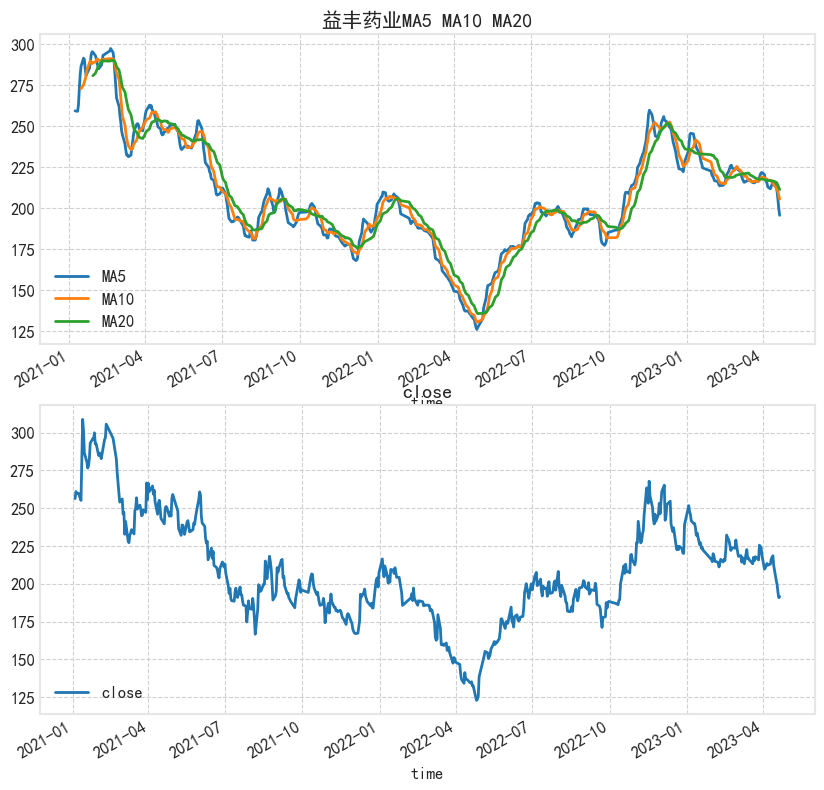

In [401]:
#益丰药业
# 计算均线
yfyy_copy[MA5] = yfyy_copy['close'].rolling(5).mean()
yfyy_copy[MA10] = yfyy_copy['close'].rolling(10).mean()
yfyy_copy[MA20] = yfyy_copy['close'].rolling(20).mean()
fig=plt.figure(figsize=(10,10))
fig.set(alpha=0.2)
# 子图一：均线图
plt.subplot2grid((2,1),(0,0))
yfyy_copy[MA5].plot()
yfyy_copy[MA10].plot()
yfyy_copy[MA20].plot()
plt.title("益丰药业MA5 MA10 MA20")
plt.legend(("MA5","MA10", "MA20"),  loc="lower left")
# 子图二：收盘价
plt.subplot2grid((2,1),(1,0))
yfyy_copy['close'].plot()
plt.title("close")
plt.legend(("close",), loc="lower left")
plt.show()

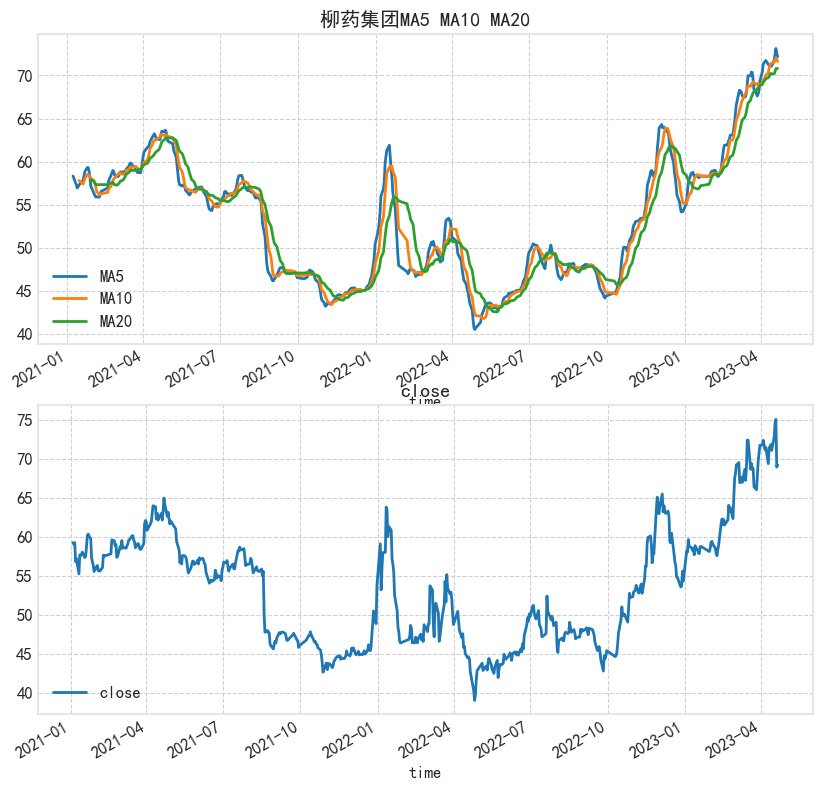

In [402]:
#柳药集团lyjt
# 计算均线
lyjt_copy[MA5] = lyjt_copy['close'].rolling(5).mean()
lyjt_copy[MA10] = lyjt_copy['close'].rolling(10).mean()
lyjt_copy[MA20] = lyjt_copy['close'].rolling(20).mean()
fig=plt.figure(figsize=(10,10))
fig.set(alpha=0.2)
# 子图一：均线图
plt.subplot2grid((2,1),(0,0))
lyjt_copy[MA5].plot()
lyjt_copy[MA10].plot()
lyjt_copy[MA20].plot()
plt.title("柳药集团MA5 MA10 MA20")
plt.legend(("MA5","MA10", "MA20"),  loc="lower left")
# 子图二：收盘价
plt.subplot2grid((2,1),(1,0))
lyjt_copy['close'].plot()
plt.title("close")
plt.legend(("close",), loc="lower left")
plt.show()

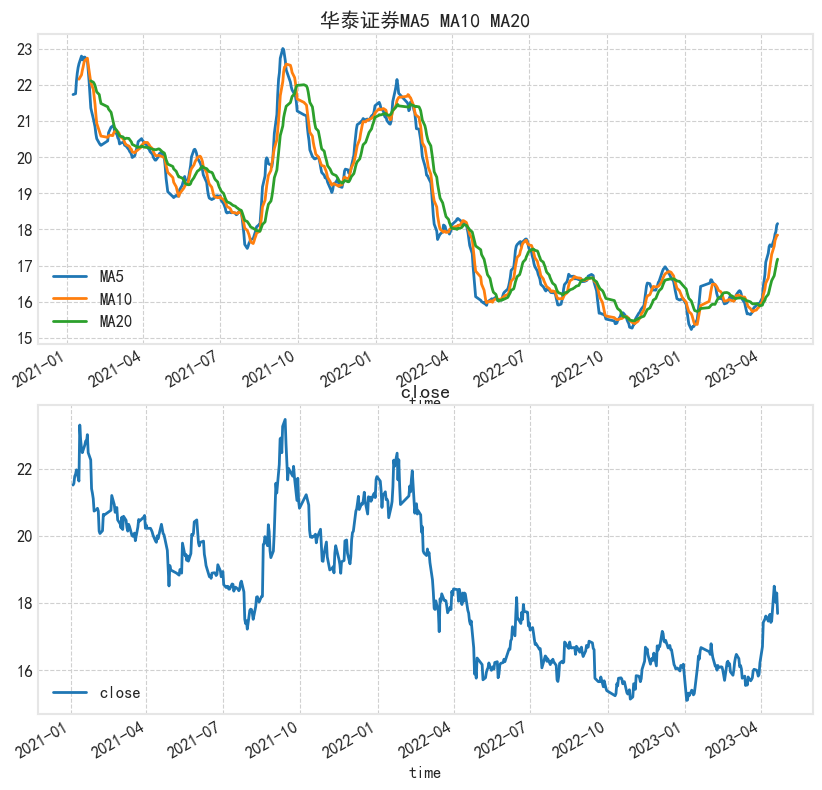

In [403]:
#华泰证券
# 计算均线
htzq_copy[MA5] = htzq_copy['close'].rolling(5).mean()
htzq_copy[MA10] = htzq_copy['close'].rolling(10).mean()
htzq_copy[MA20] = htzq_copy['close'].rolling(20).mean()
fig=plt.figure(figsize=(10,10))
fig.set(alpha=0.2)
# 子图一：均线图
plt.subplot2grid((2,1),(0,0))
htzq_copy[MA5].plot()
htzq_copy[MA10].plot()
htzq_copy[MA20].plot()
plt.title("华泰证券MA5 MA10 MA20")
plt.legend(("MA5","MA10", "MA20"),  loc="lower left")
# 子图二：收盘价
plt.subplot2grid((2,1),(1,0))
htzq_copy['close'].plot()
plt.title("close")
plt.legend(("close",), loc="lower left")
plt.show()

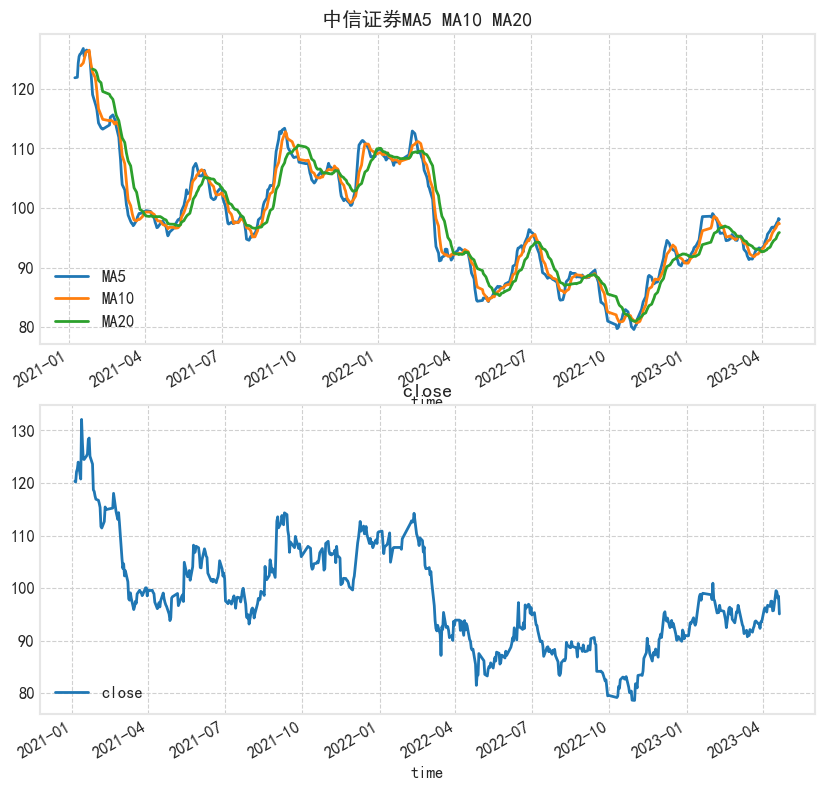

In [404]:
#中信证券
# 计算均线
zxzq_copy[MA5] = zxzq_copy['close'].rolling(5).mean()
zxzq_copy[MA10] = zxzq_copy['close'].rolling(10).mean()
zxzq_copy[MA20] = zxzq_copy['close'].rolling(20).mean()
fig=plt.figure(figsize=(10,10))
fig.set(alpha=0.2)
# 子图一：均线图
plt.subplot2grid((2,1),(0,0))
zxzq_copy[MA5].plot()
zxzq_copy[MA10].plot()
zxzq_copy[MA20].plot()
plt.title("中信证券MA5 MA10 MA20")
plt.legend(("MA5","MA10", "MA20"),  loc="lower left")
# 子图二：收盘价
plt.subplot2grid((2,1),(1,0))
zxzq_copy['close'].plot()
plt.title("close")
plt.legend(("close",), loc="lower left")
plt.show()

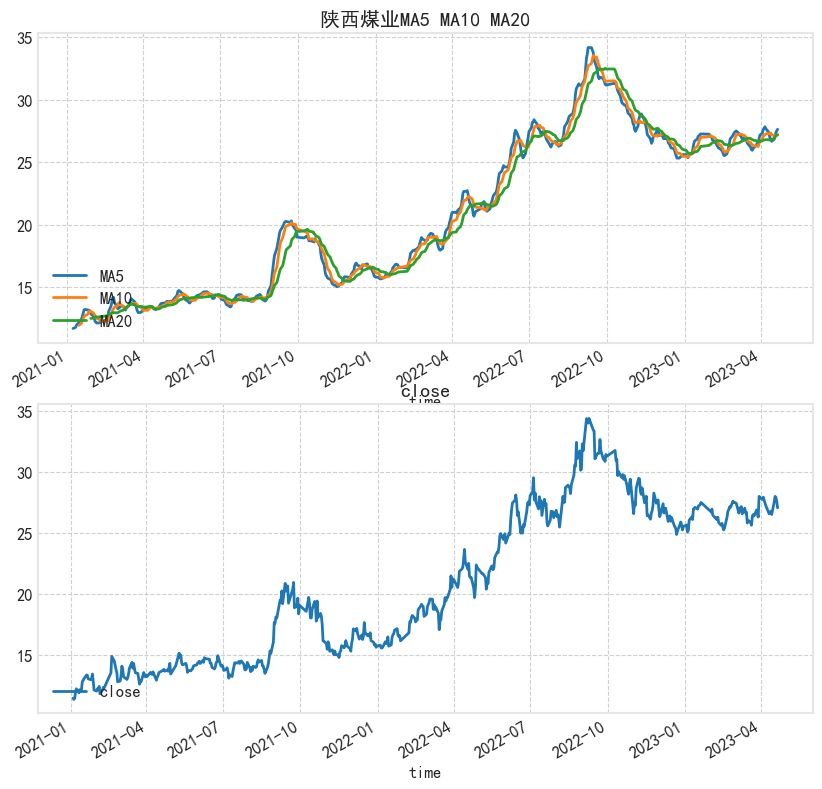

In [405]:
#陕西煤业
# 计算均线
sxmy_copy[MA5] = sxmy_copy['close'].rolling(5).mean()
sxmy_copy[MA10] = sxmy_copy['close'].rolling(10).mean()
sxmy_copy[MA20] = sxmy_copy['close'].rolling(20).mean()
fig=plt.figure(figsize=(10,10))
fig.set(alpha=0.2)
# 子图一：均线图
plt.subplot2grid((2,1),(0,0))
sxmy_copy[MA5].plot()
sxmy_copy[MA10].plot()
sxmy_copy[MA20].plot()
plt.title("陕西煤业MA5 MA10 MA20")
plt.legend(("MA5","MA10", "MA20"),  loc="lower left")
# 子图二：收盘价
plt.subplot2grid((2,1),(1,0))
sxmy_copy['close'].plot()
plt.title("close")
plt.legend(("close",), loc="lower left")
plt.show()

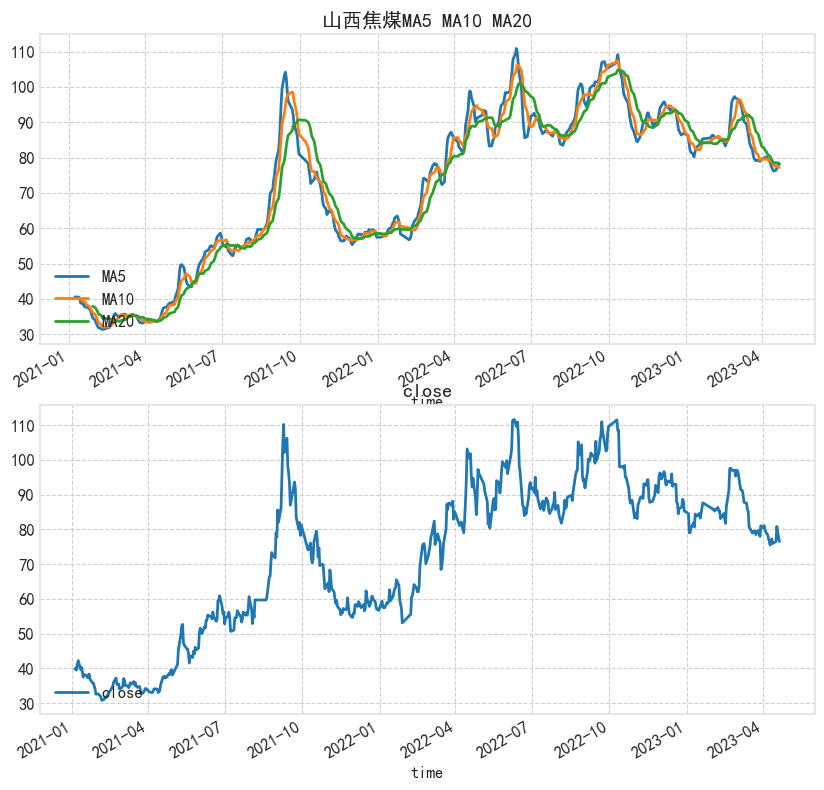

In [406]:
#山西焦煤
# 计算均线
sxjm_copy[MA5] = sxjm_copy['close'].rolling(5).mean()
sxjm_copy[MA10] = sxjm_copy['close'].rolling(10).mean()
sxjm_copy[MA20] = sxjm_copy['close'].rolling(20).mean()
fig=plt.figure(figsize=(10,10))
fig.set(alpha=0.2)
# 子图一：均线图
plt.subplot2grid((2,1),(0,0))
sxjm_copy[MA5].plot()
sxjm_copy[MA10].plot()
sxjm_copy[MA20].plot()
plt.title("山西焦煤MA5 MA10 MA20")
plt.legend(("MA5","MA10", "MA20"),  loc="lower left")
# 子图二：收盘价
plt.subplot2grid((2,1),(1,0))
sxjm_copy['close'].plot()
plt.title("close")
plt.legend(("close",), loc="lower left")
plt.show()

# 同行业比较

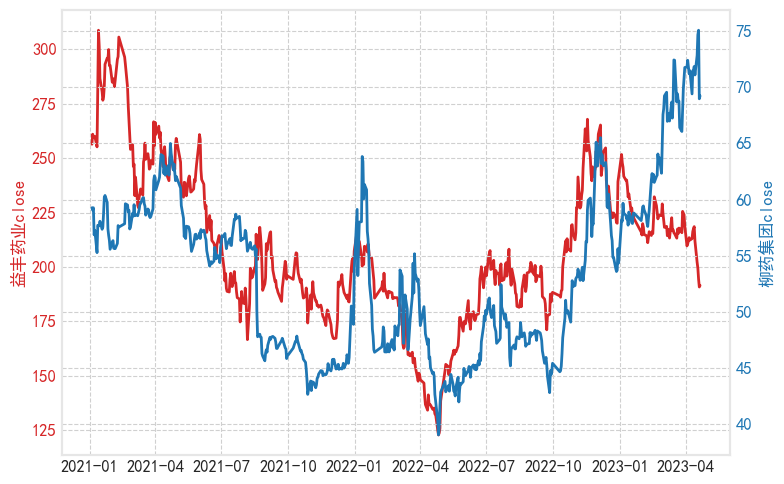

In [407]:
#益丰药业、柳药集团

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel('益丰药业close', color=color)
ax1.plot(yfyy_copy['close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('柳药集团close', color=color)
ax2.plot(lyjt_copy['close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.set_size_inches(8, 5)
# 显示图形
fig.tight_layout()
plt.show()

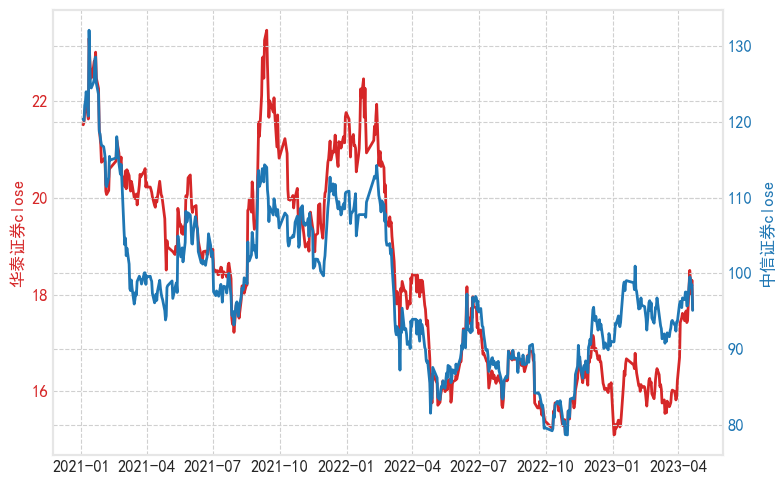

In [408]:
#华泰证券、中信证券

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel('华泰证券close', color=color)
ax1.plot(htzq_copy['close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('中信证券close', color=color)
ax2.plot(zxzq_copy['close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.set_size_inches(8, 5)
# 显示图形
fig.tight_layout()
plt.show()

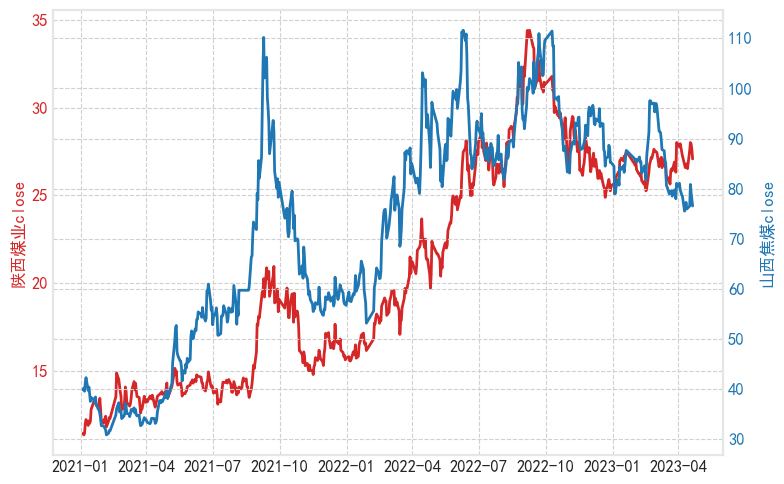

In [409]:
#陕西煤业、山西焦煤

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel('陕西煤业close', color=color)
ax1.plot(sxmy_copy['close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('山西焦煤close', color=color)
ax2.plot(sxjm_copy['close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.set_size_inches(8, 5)
# 显示图形
fig.tight_layout()
plt.show()

# 蜡烛图

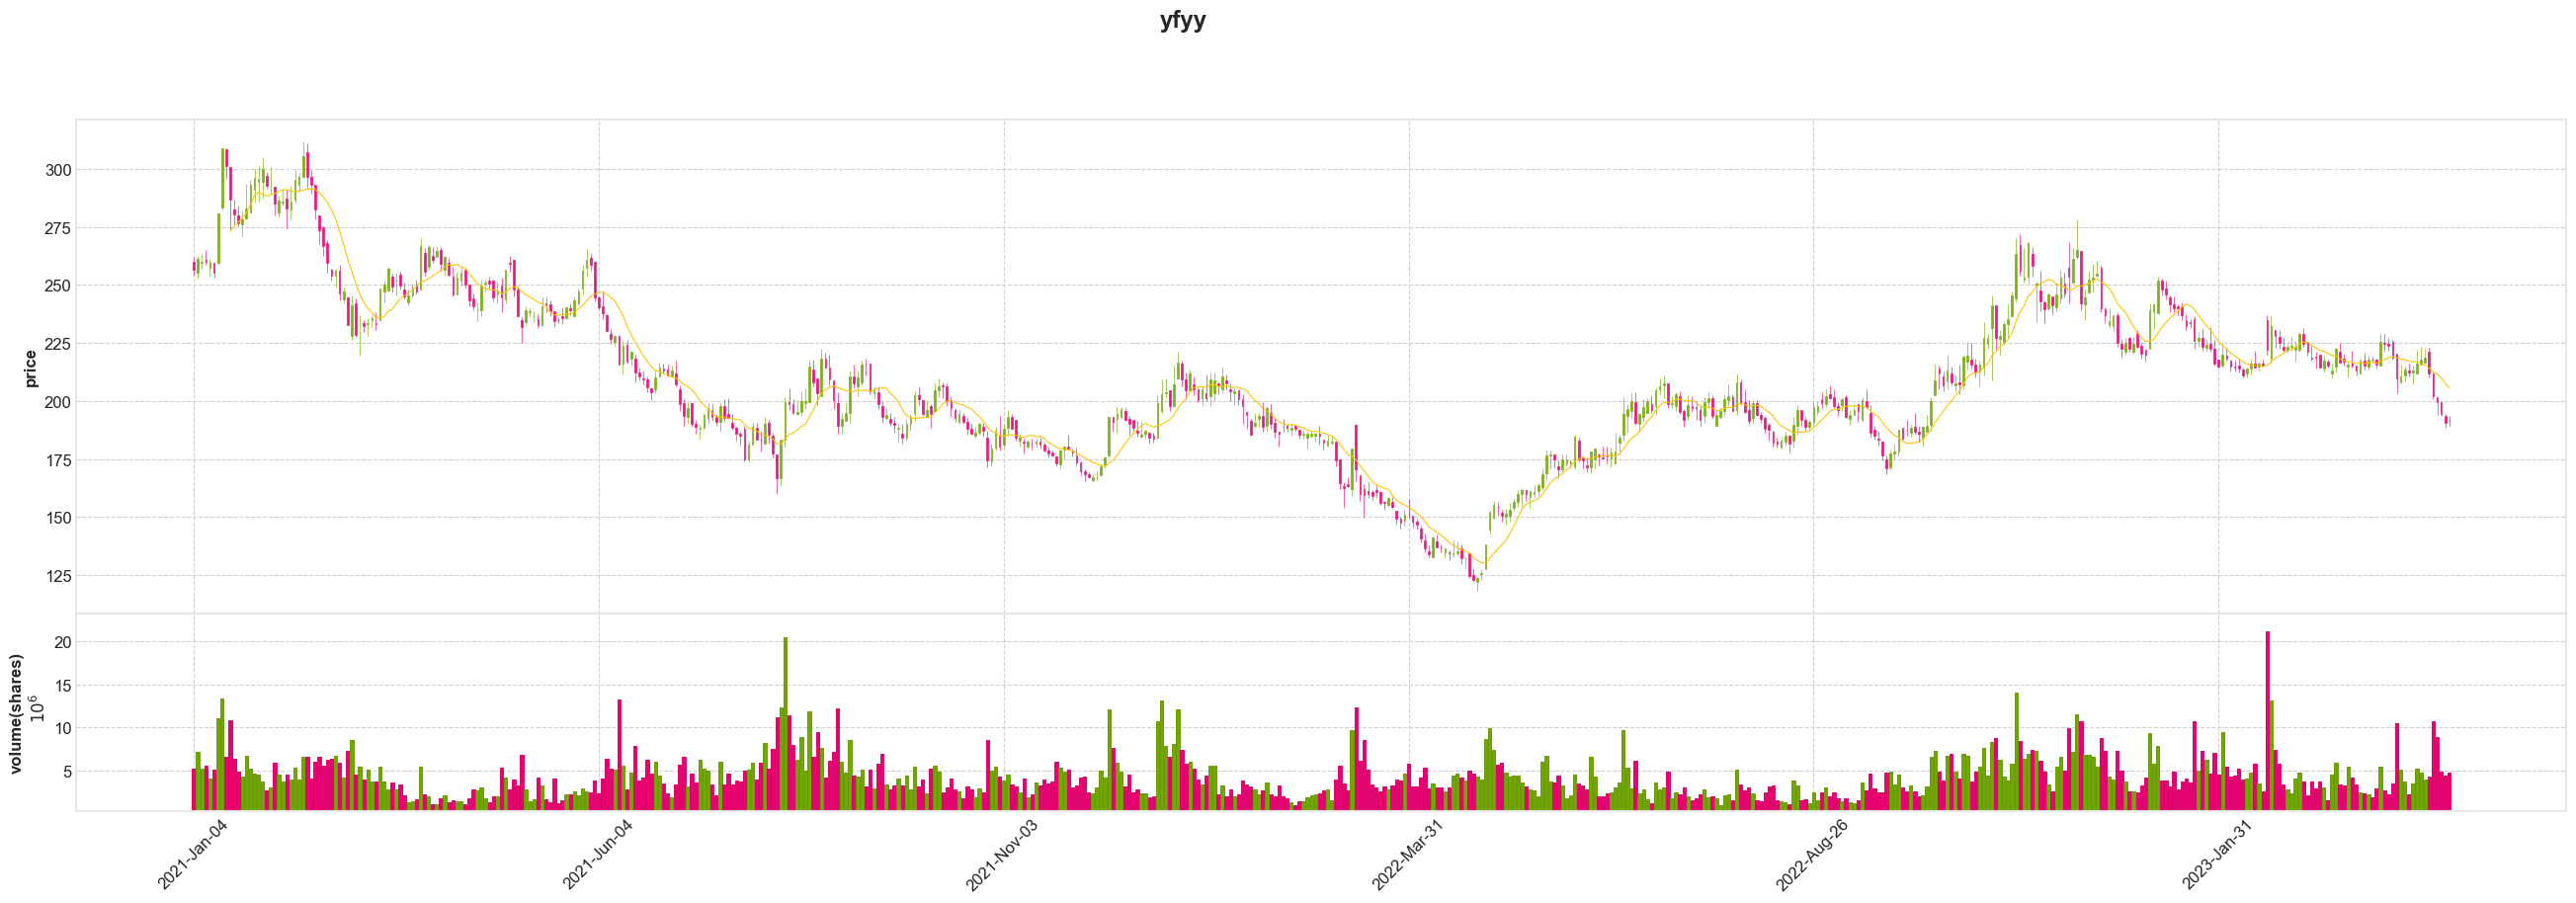

In [410]:
#益丰药业
mpf.plot(yfyy_copy, type="candle", title="yfyy", ylabel="price",style="binance",volume=True,
    ylabel_lower="volume(shares)",figsize=(35, 10), mav=(10) )

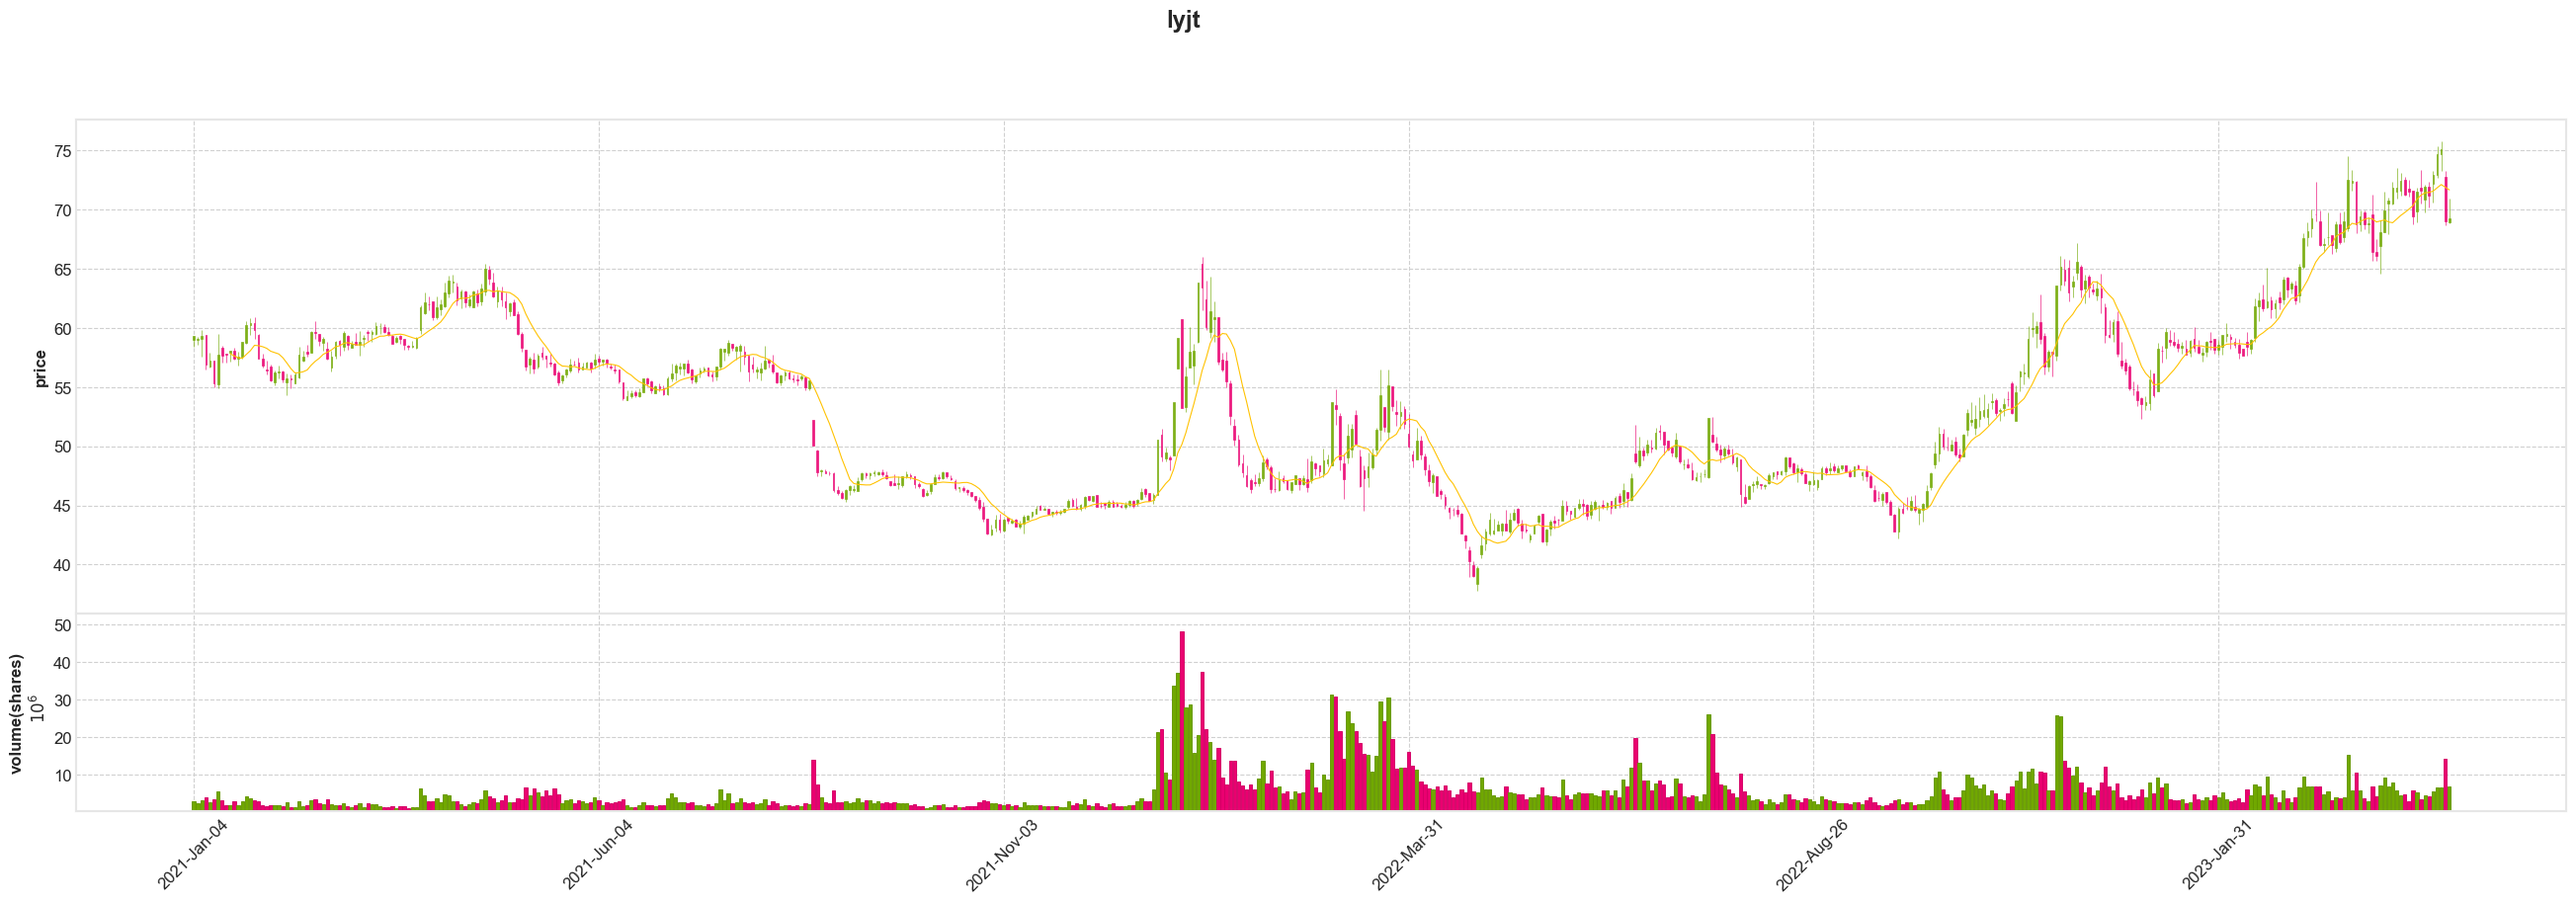

In [411]:
#柳药集团
mpf.plot(lyjt_copy, type="candle", title="lyjt", ylabel="price",style="binance",volume=True,
    ylabel_lower="volume(shares)",figsize=(35, 10), mav=(10) )

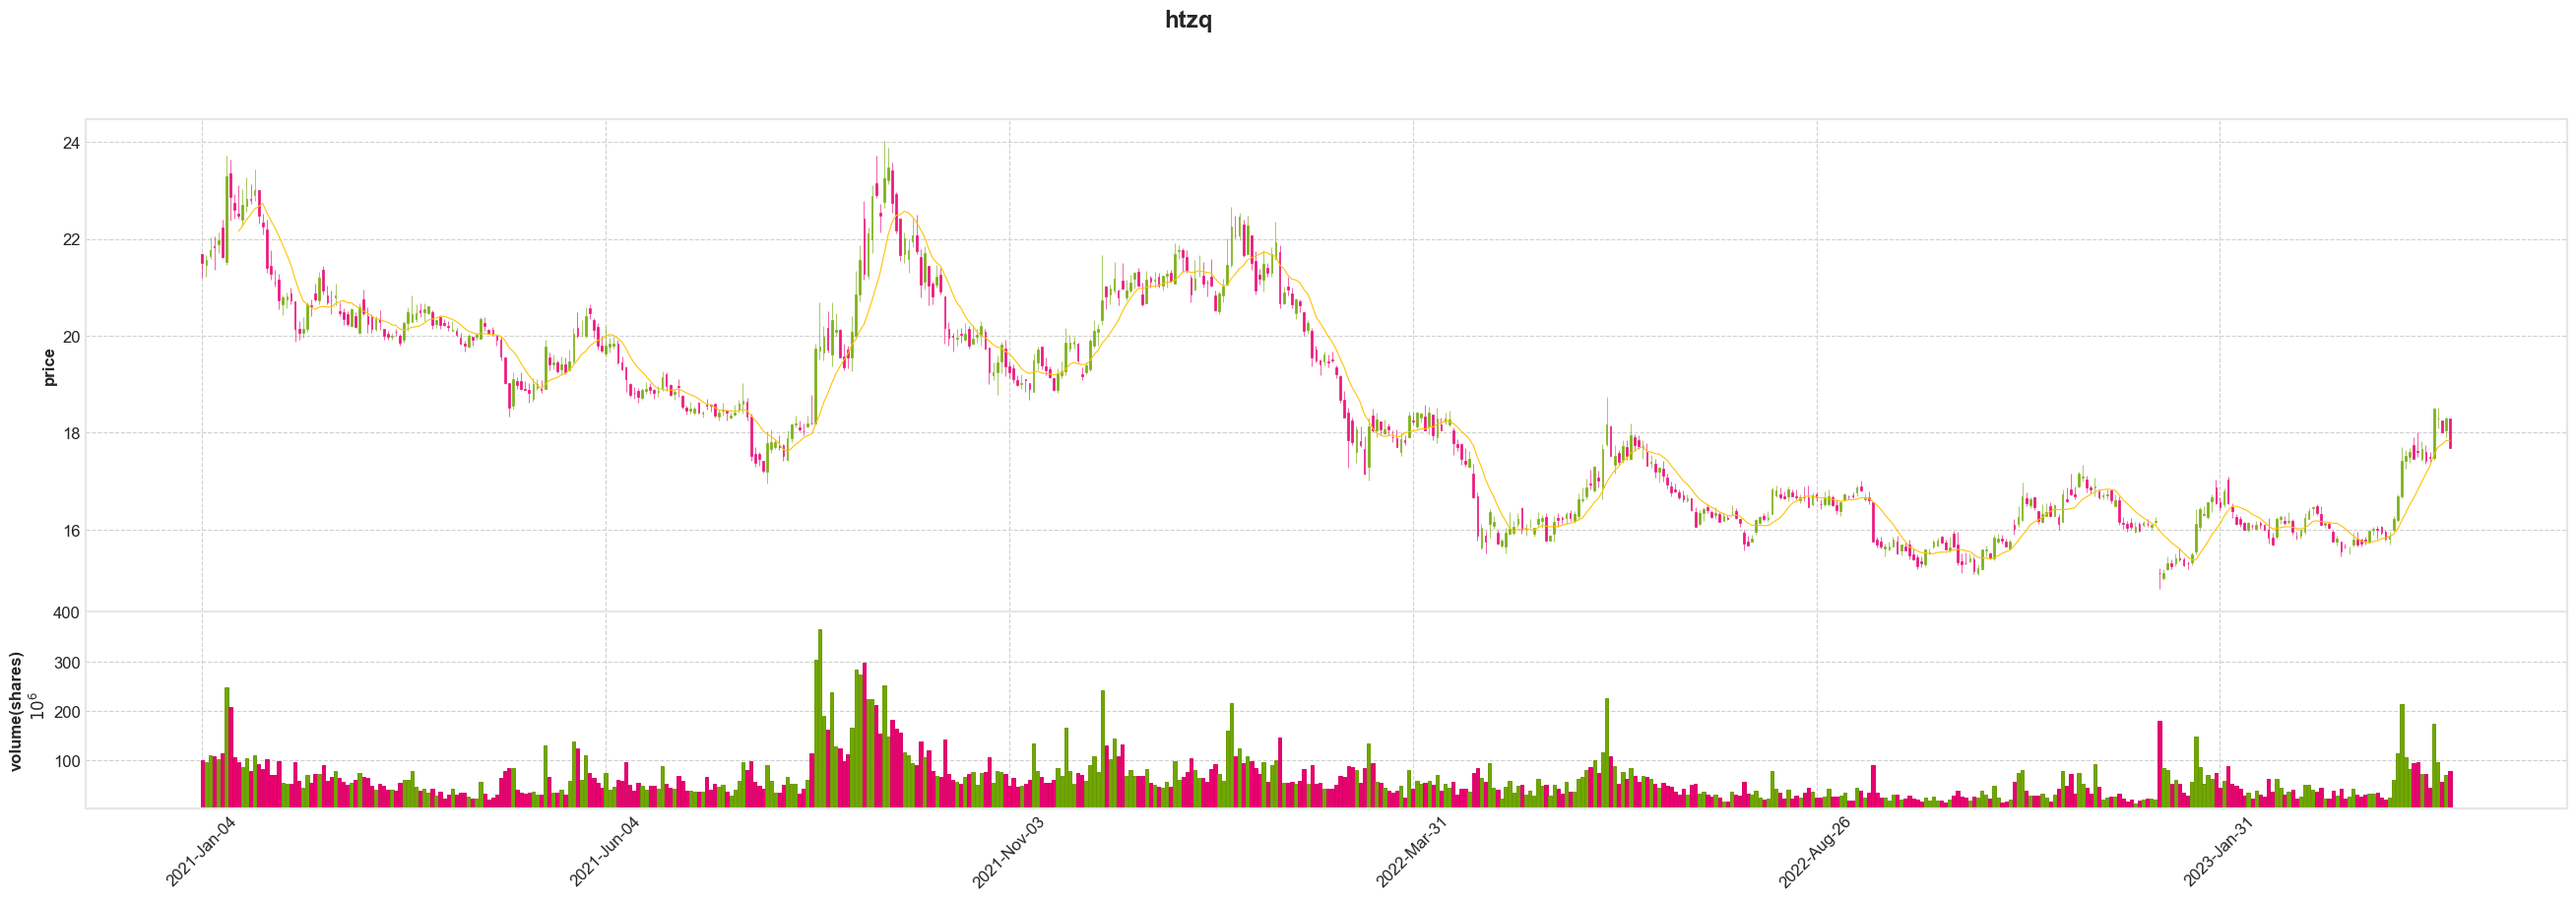

In [412]:
#华泰证券
mpf.plot(htzq_copy, type="candle", title="htzq", ylabel="price",style="binance",volume=True,
    ylabel_lower="volume(shares)",figsize=(35, 10), mav=(10) )

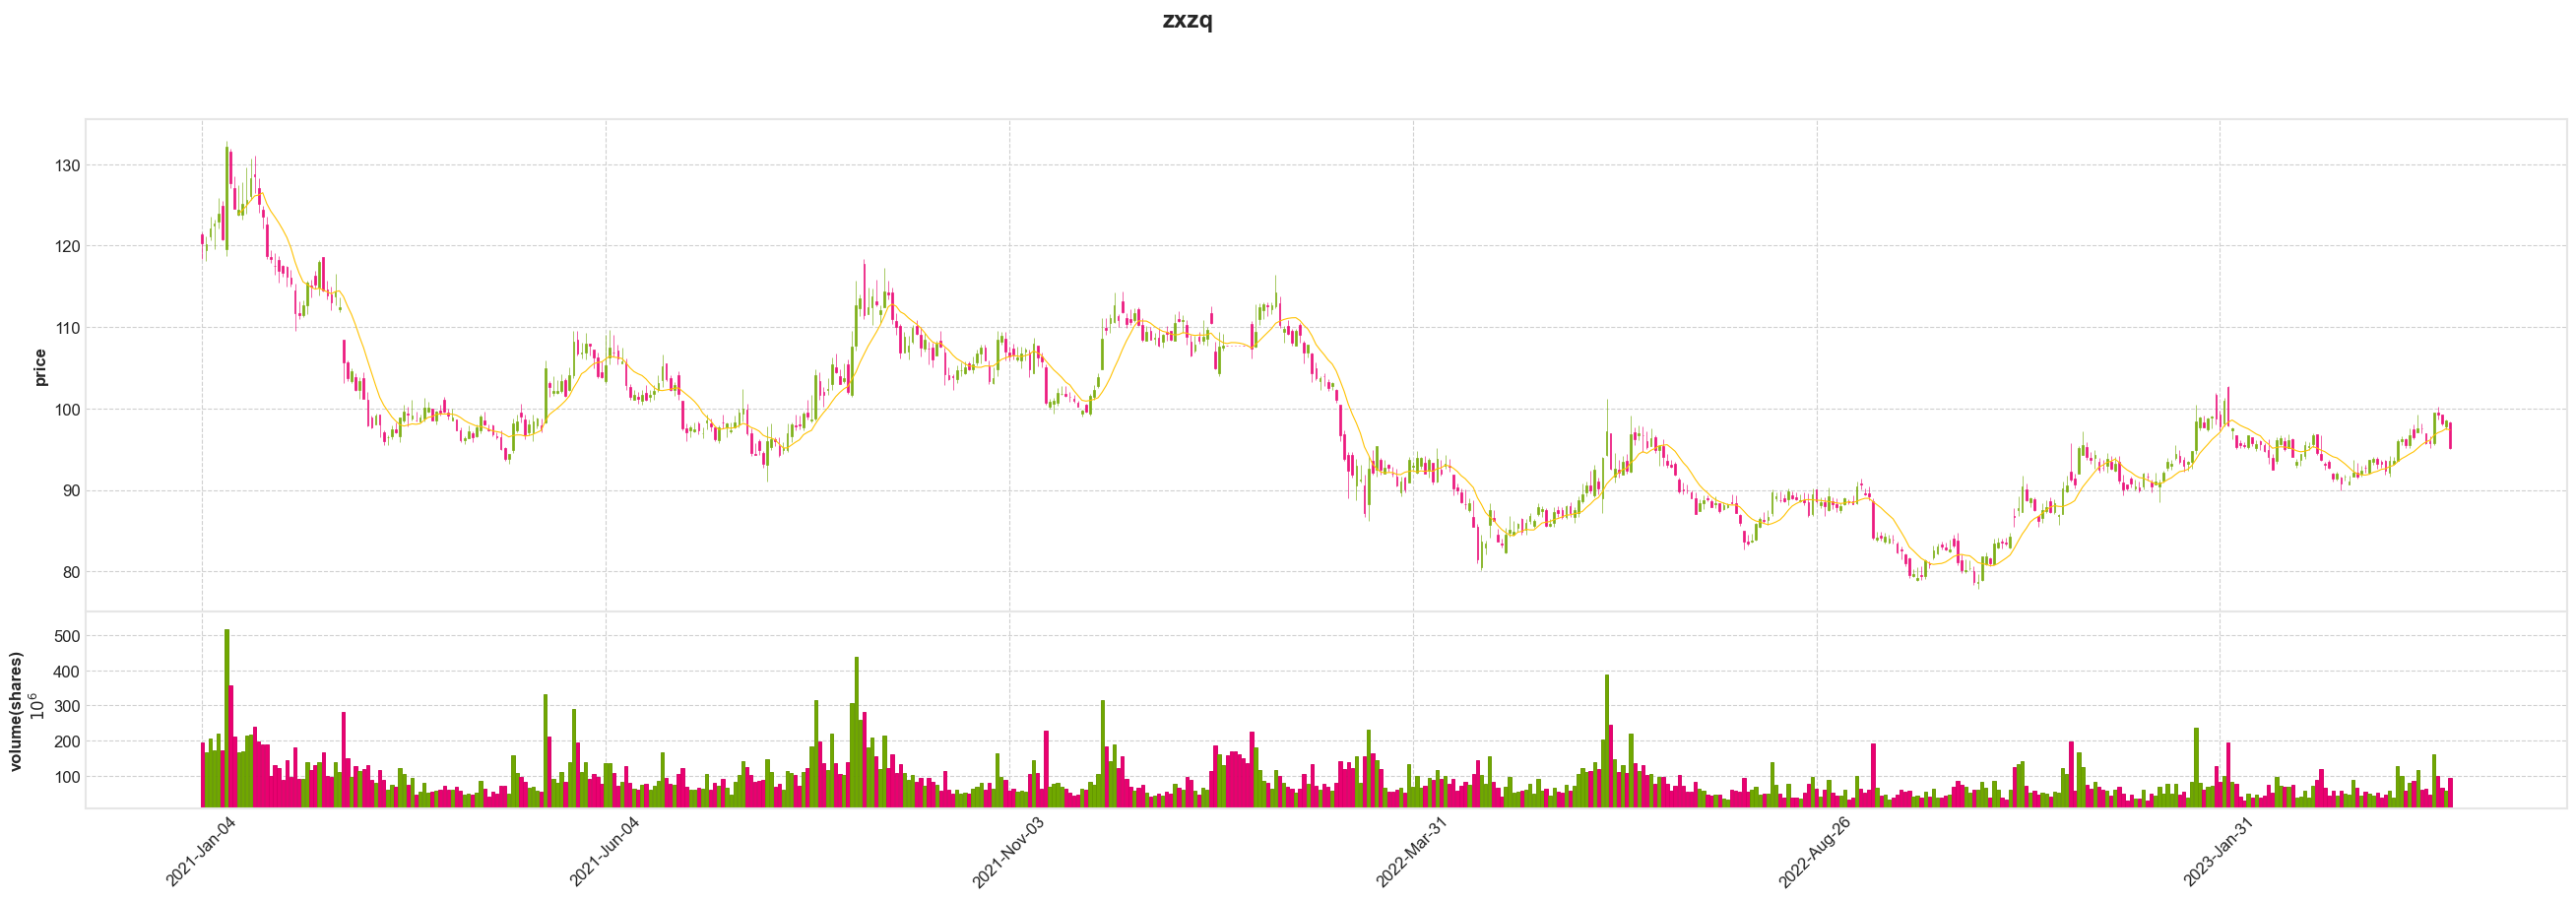

In [413]:
#中信证券
mpf.plot(zxzq_copy, type="candle", title="zxzq", ylabel="price",style="binance",volume=True,
    ylabel_lower="volume(shares)",figsize=(35, 10), mav=(10) )

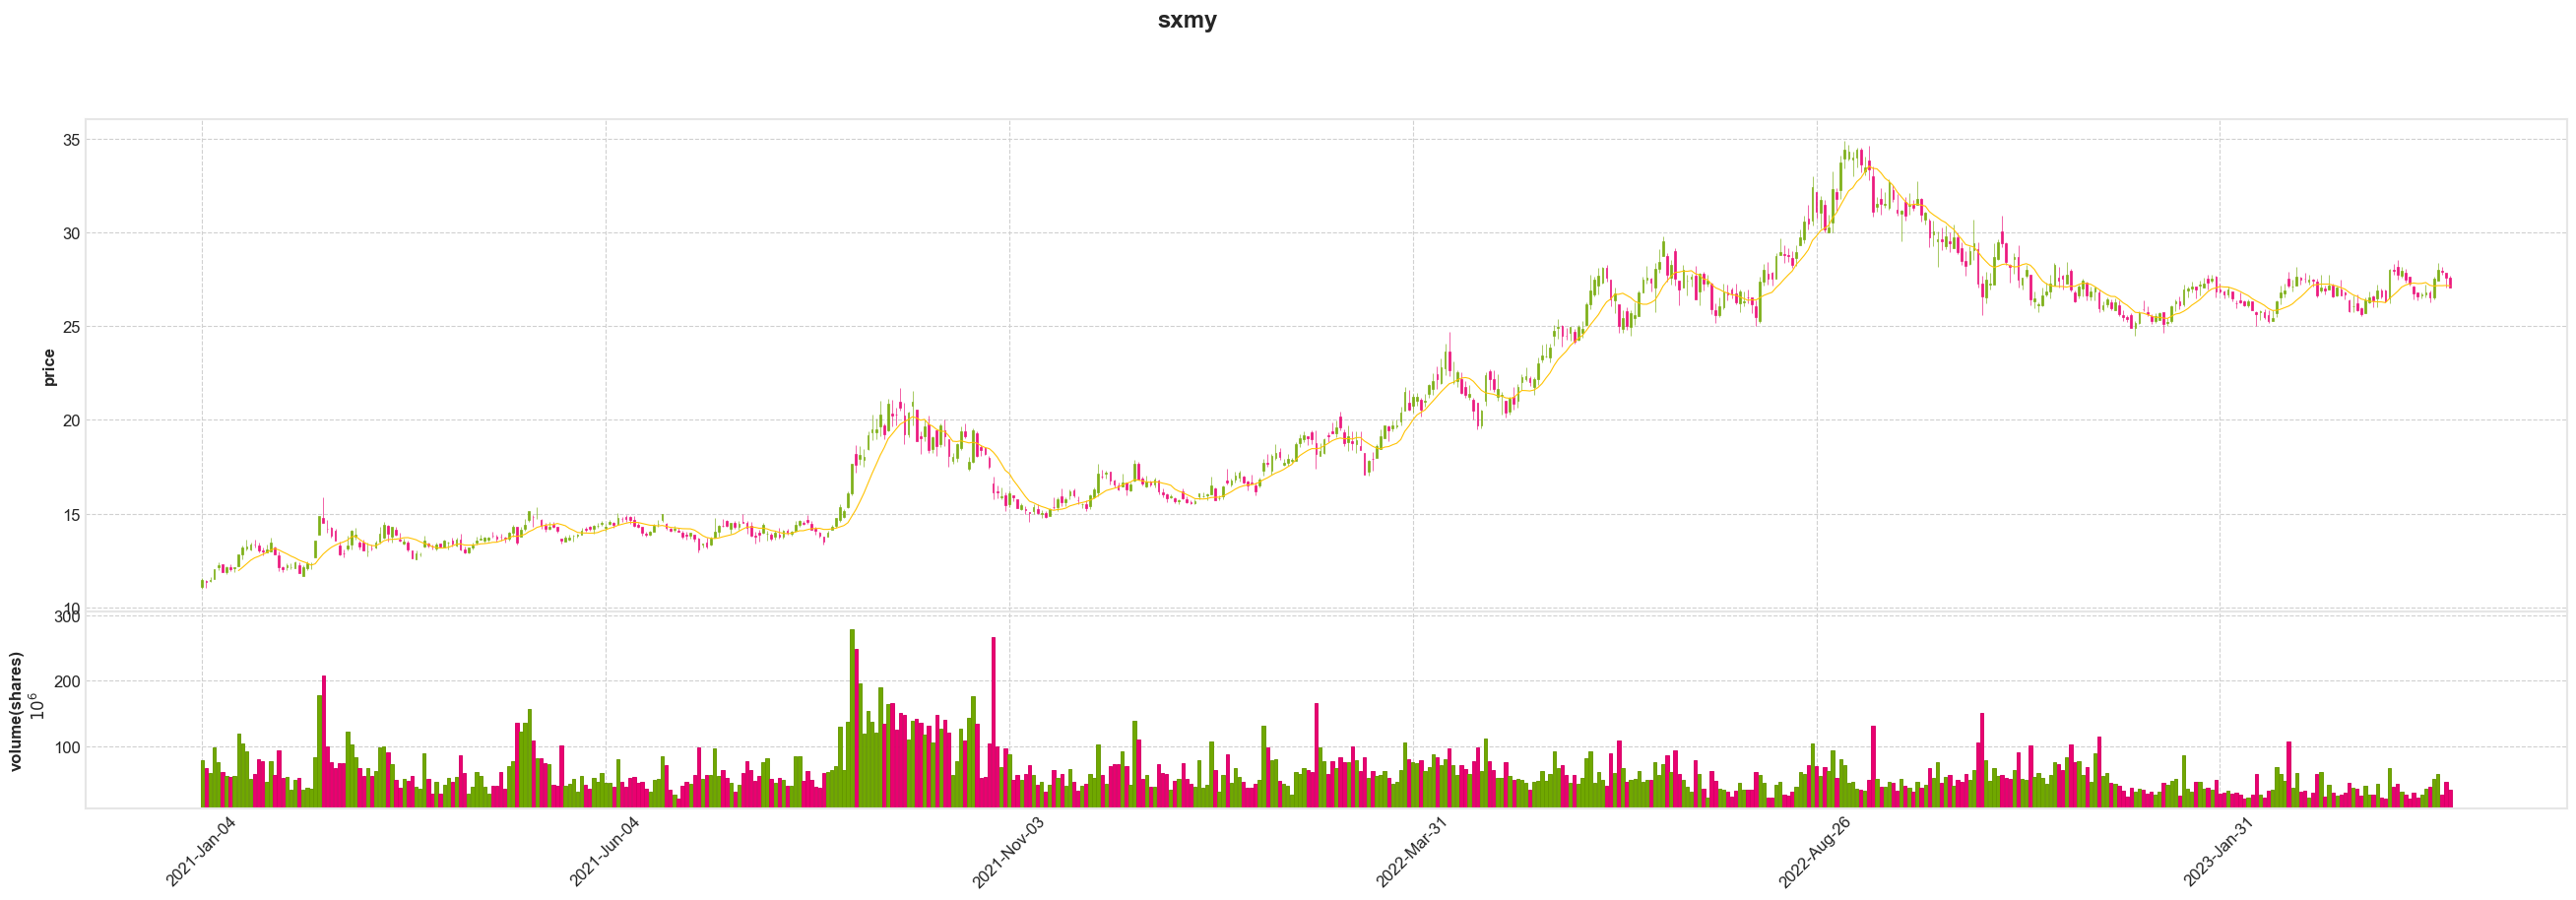

In [414]:
#陕西煤业
mpf.plot(sxmy_copy, type="candle", title="sxmy", ylabel="price",style="binance",volume=True,
    ylabel_lower="volume(shares)",figsize=(35, 10), mav=(10) )

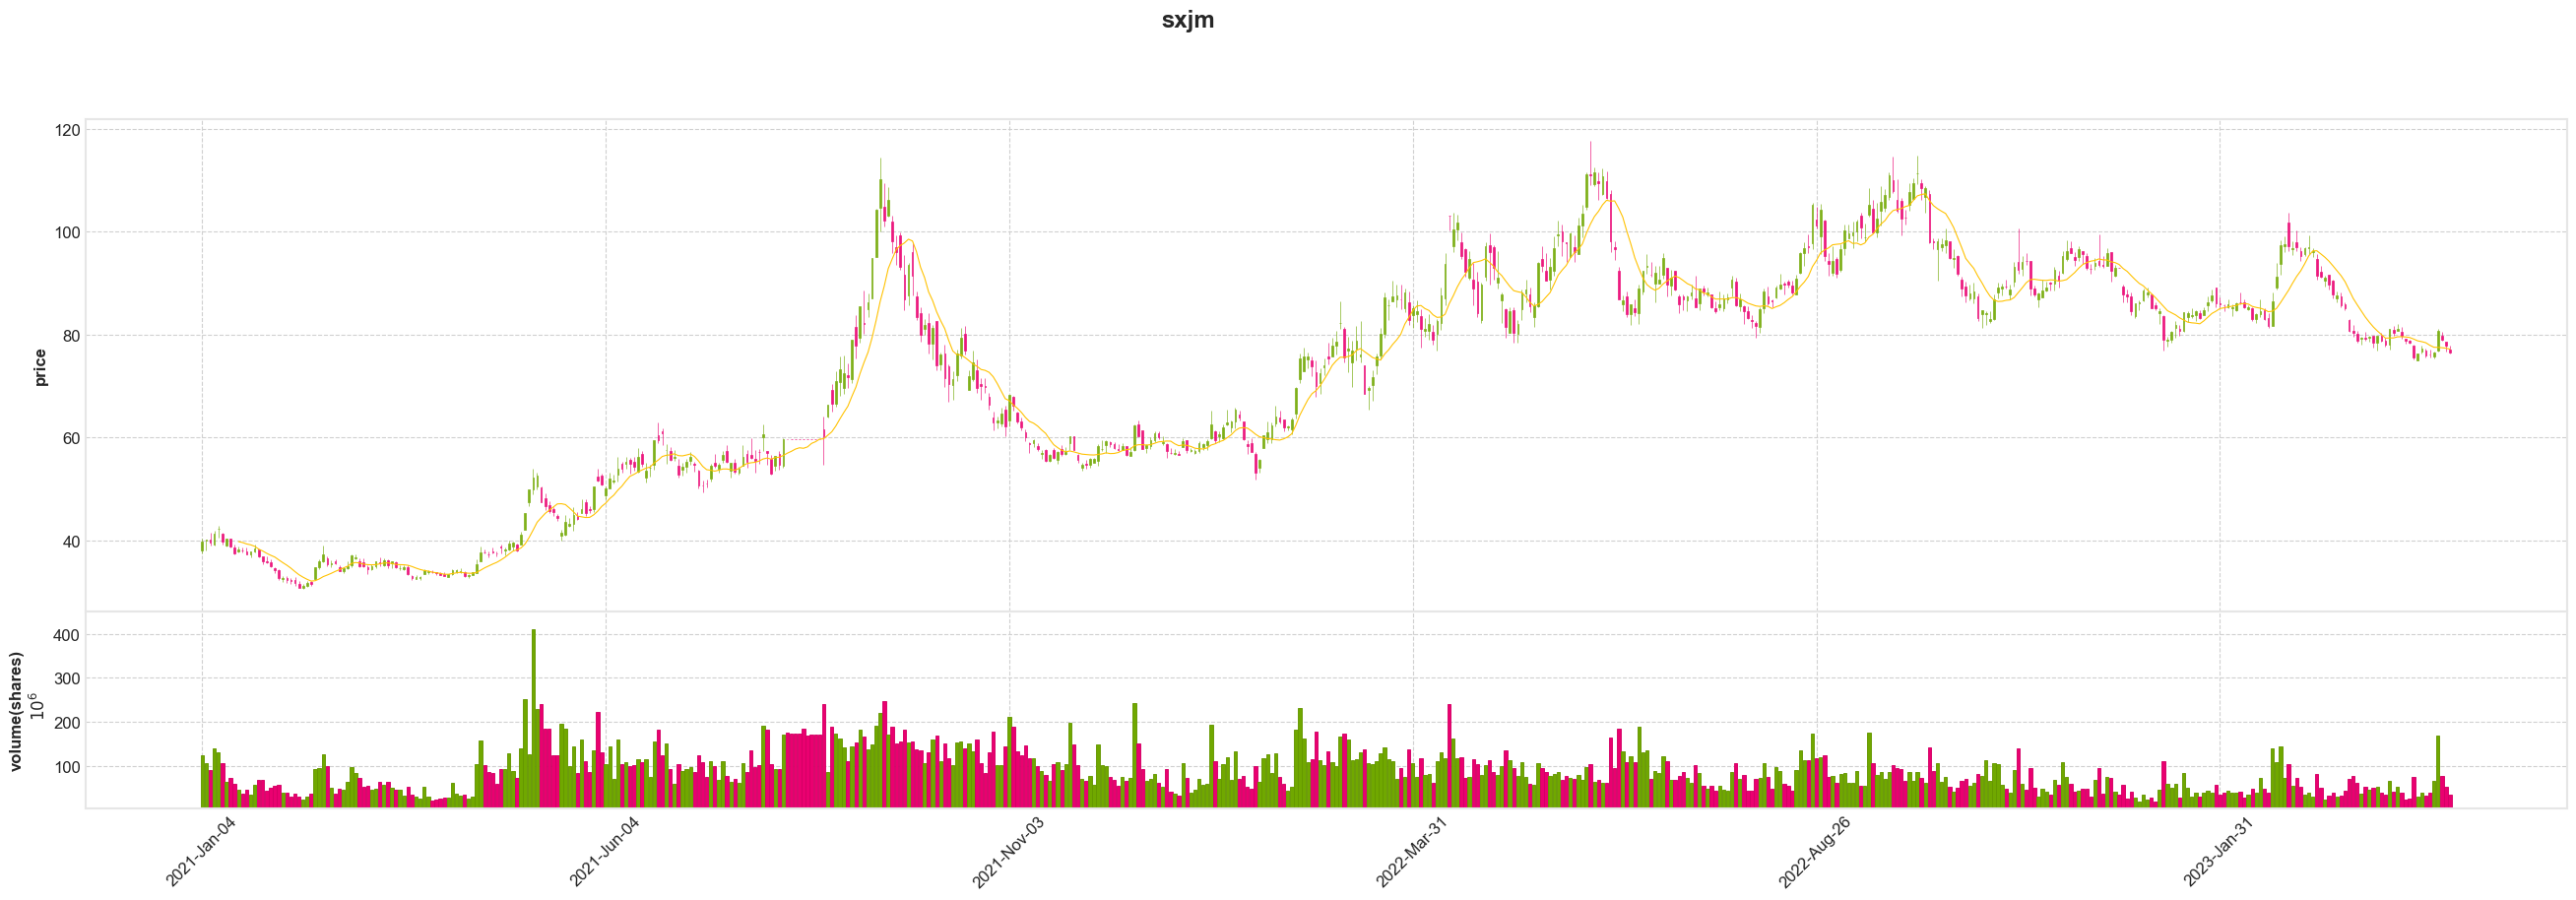

In [415]:
#山西焦煤
mpf.plot(sxjm_copy, type="candle", title="sxjm", ylabel="price",style="binance",volume=True,
    ylabel_lower="volume(shares)",figsize=(35, 10), mav=(10) )

In [416]:
sxjm_copy

,number,thscode,open,high,low,close,volume,amount,turnoverRatio,totalCapital,pe,pb,MA5,MA10,MA20
time,,,,,,,,,,,,,,,
2021-01-04,3348,000983.SZ,38.10,40.27,37.50,39.80,125072498.00,732351466.70,3.05,24087772800.00,12.31,1.29,NaN,NaN,NaN
2021-01-05,3347,000983.SZ,39.93,40.14,38.10,40.14,108439925.00,628471014.21,2.65,24292600800.00,12.42,1.30,NaN,NaN,NaN
2021-01-06,3346,000983.SZ,40.20,41.42,38.98,39.53,90889815.00,536386223.93,2.22,23923910400.00,12.23,1.28,NaN,NaN,NaN
2021-01-07,3345,000983.SZ,39.26,41.83,39.05,41.29,140479745.00,848082438.82,3.43,24989016000.00,12.77,1.34,NaN,NaN,NaN
2021-01-08,3344,000983.SZ,42.17,42.77,40.47,42.23,132755254.00,817445198.67,3.24,25562534400.00,13.07,1.37,40.60,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,2795,000983.SZ,75.78,76.73,75.34,76.51,68204103.00,710661823.41,1.66,54422994318.88,5.51,1.52,76.41,77.56,78.46
2023-04-18,2794,000983.SZ,76.88,81.05,76.66,80.83,168965836.00,1831605841.35,4.12,57492742564.40,5.82,1.60,77.32,77.54,78.56
2023-04-19,2793,000983.SZ,79.88,80.46,78.85,79.07,78821843.00,858168062.12,1.92,56244031413.68,5.69,1.57,77.68,77.47,78.54


In [417]:
szzz=pd.read_csv("result_szzz.csv")

In [418]:
szzz['time']=szzz['time'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [419]:
szzz_copy=szzz.copy()
szzz_copy=szzz_copy.set_index(szzz_copy.columns[1])

In [420]:
szzz_copy

,number,thscode,open,high,low,close,volume,amount,turnoverRatio
time,,,,,,,,,
2023-04-21,1,000001.SH,3364.00,3367.61,3301.26,3301.26,387395098.00,530517857772.00,0.92
2023-04-20,2,000001.SH,3367.05,3371.37,3344.02,3367.03,350354965.00,499672394216.00,0.83
2023-04-19,3,000001.SH,3391.35,3394.96,3364.64,3370.13,346123443.00,476496941017.00,0.82
2023-04-18,4,000001.SH,3379.23,3396.17,3375.78,3393.33,348399486.00,474287388944.00,0.82
2023-04-17,5,000001.SH,3337.06,3385.61,3336.39,3385.61,402809926.00,523790271022.00,0.95
...,...,...,...,...,...,...,...,...,...
2021-01-08,554,000001.SH,3577.69,3588.06,3544.89,3570.11,345557896.00,502170815613.80,0.95
2021-01-07,555,000001.SH,3552.91,3576.20,3526.62,3576.20,405348226.00,545709628110.30,1.12
2021-01-06,556,000001.SH,3530.91,3556.80,3513.13,3550.88,370230926.00,521799529791.80,1.02


In [421]:
szzz_copy.index.dtype

dtype('<M8[ns]')

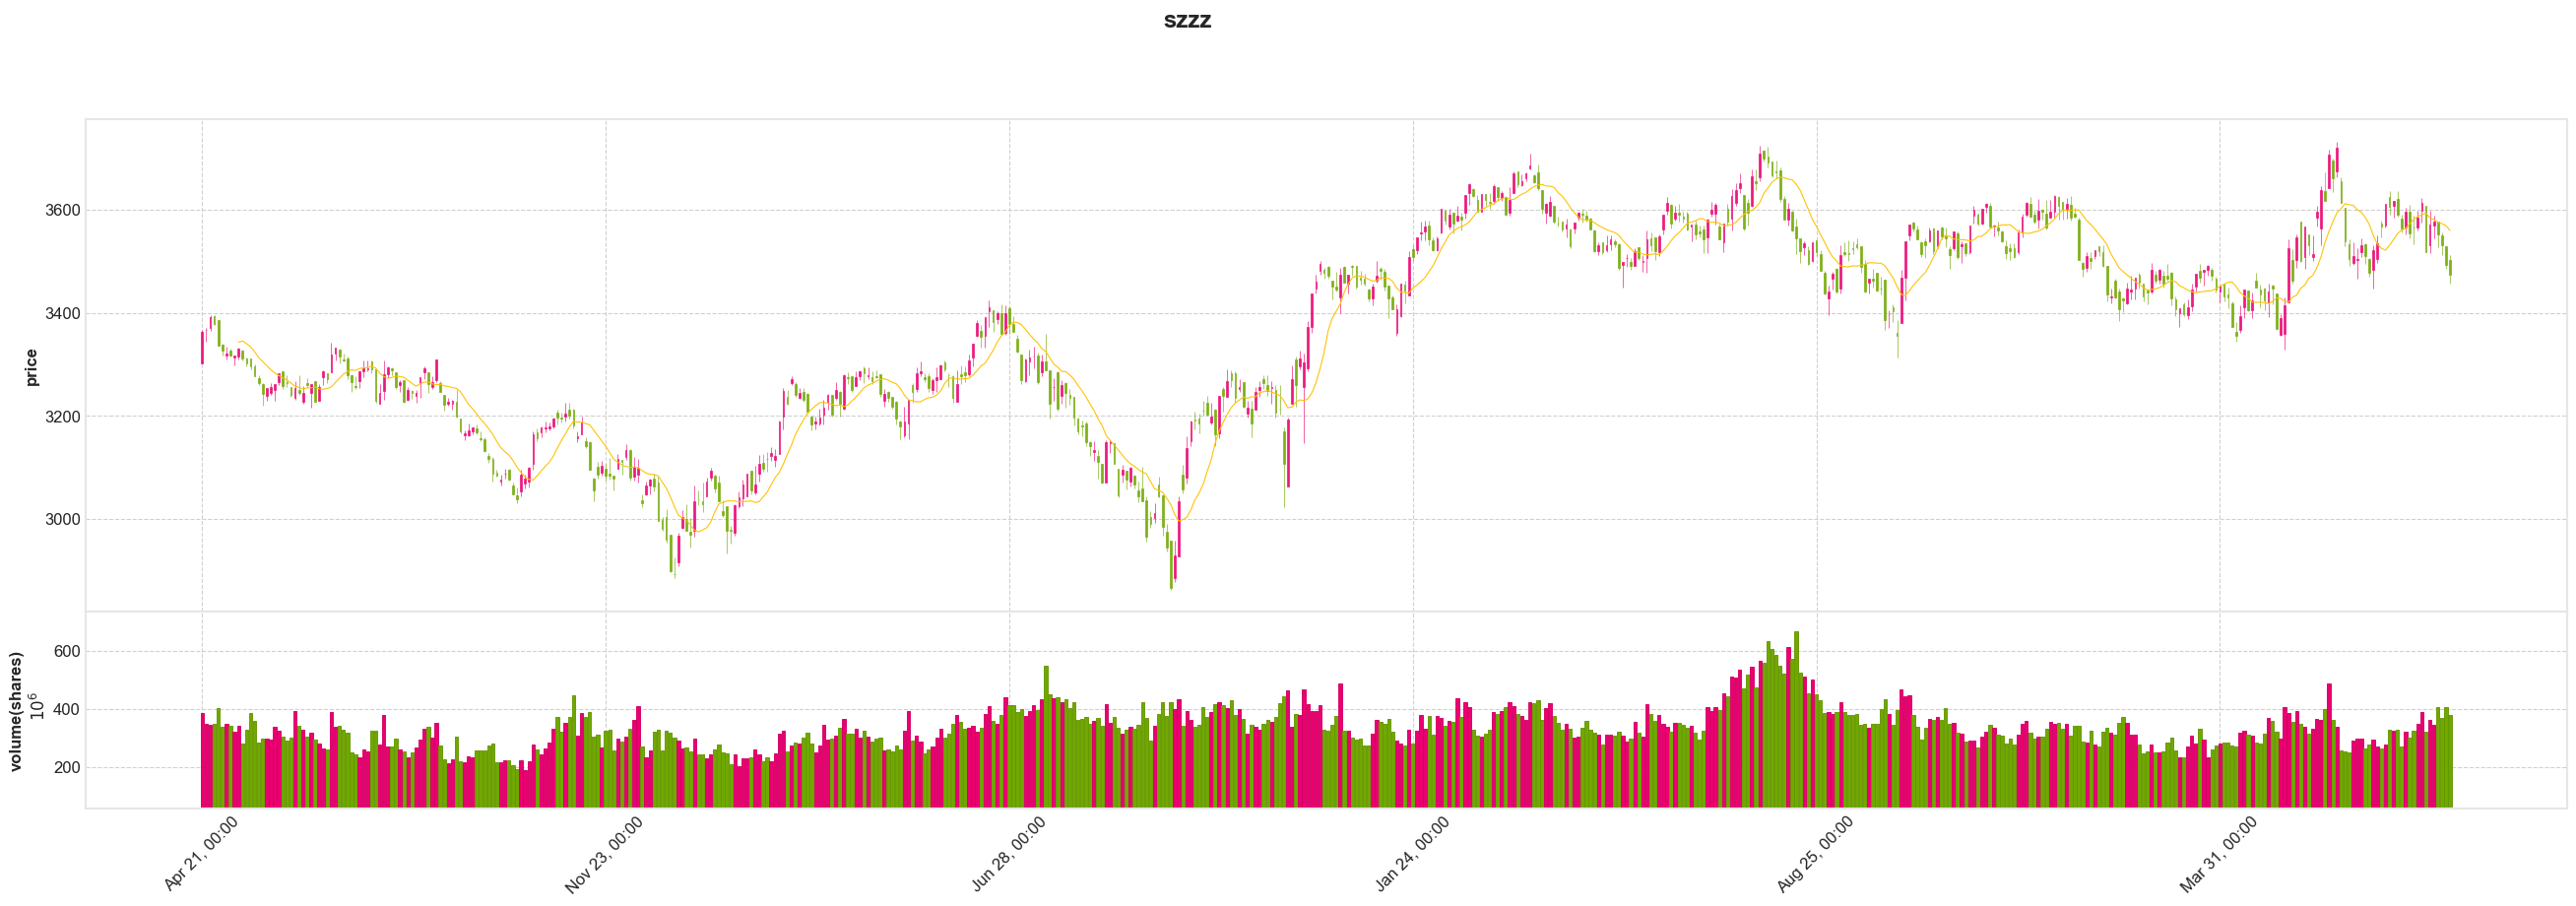

In [422]:
mpf.plot(szzz_copy, type="candle", title="szzz", ylabel="price",style="binance",volume=True,
    ylabel_lower="volume(shares)",figsize =(35, 10), mav=(10) )

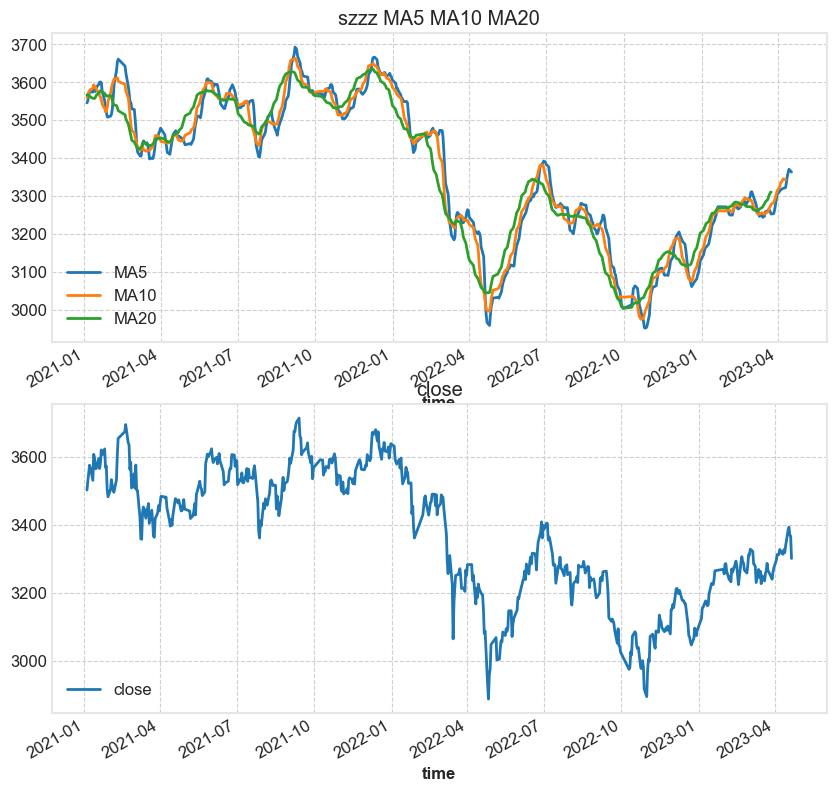

In [425]:
#山西焦煤
# 计算均线
szzz_copy[MA5] = szzz_copy['close'].rolling(5).mean()
szzz_copy[MA10] = szzz_copy['close'].rolling(10).mean()
szzz_copy[MA20] =szzz_copy['close'].rolling(20).mean()
fig=plt.figure(figsize=(10,10))
fig.set(alpha=0.2)
# 子图一：均线图
plt.subplot2grid((2,1),(0,0))
szzz_copy[MA5].plot()
szzz_copy[MA10].plot()
szzz_copy[MA20].plot()
plt.title("szzz MA5 MA10 MA20")
plt.legend(("MA5","MA10", "MA20"),  loc="lower left")
# 子图二：收盘价
plt.subplot2grid((2,1),(1,0))
szzz_copy['close'].plot()
plt.title("close")
plt.legend(("close",), loc="lower left")
plt.show()

In [ ]:
A